<a href="https://colab.research.google.com/github/22110100342211010034-a11/UTS_Machine-Learning/blob/main/UTS%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**


In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


**LOAD DARASET**


In [2]:
df = pd.read_csv("/content/bmw.csv", sep=';')
print("5 data teratas:")
display(df.head())


5 data teratas:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


**CEK DATA DUPLIKAT**


In [3]:
# Cek data kosong (null)
print("=== CEK DATA NULL ===")
print(df.isnull().sum())

# Cek duplikat
print("\nJumlah duplikat:", df.duplicated().sum())

# Hapus duplikat jika ada
df = df.drop_duplicates()


=== CEK DATA NULL ===
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Jumlah duplikat: 117


**MEMISAHKAN FITUR DAN LABEL**


In [4]:
# Tentukan fitur dan label
X = df[['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
y = df['model']


**BALANCING SMOTE**


In [5]:
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur agar skala serupa

# 1. Encode categorical features in X
X_encoded = pd.get_dummies(X, columns=['transmission', 'fuelType'])

# 2. Encode the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Apply SMOTE for resampling (as SMOTE was imported)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)


Data training: (46732, 14)
Data testing: (11684, 14)


**TRAINING MODEL**


In [6]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    random_state=42
)

print("\n=== Memulai Training Model ===")
start_time_train = time.time()

model.fit(X_train, y_train)

end_time_train = time.time()
waktu_training = end_time_train - start_time_train
print(f"✅ Training Selesai. Waktu: {waktu_training:.4f} detik")



=== Memulai Training Model ===
✅ Training Selesai. Waktu: 32.9467 detik


**EVALUASI**



In [7]:
start_time_pred = time.time()

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

end_time_pred = time.time()
waktu_prediksi = end_time_pred - start_time_pred


print("\n=== HASIL EVALUASI ===")
print(f"Waktu Prediksi (pada {len(X_test)} data): {waktu_prediksi:.4f} detik\n")
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc * 100:.4f}%\n")
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"AUC Score (Macro OVR): {auc:.4f}\n")
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=le.classes_, digits=4
))



=== HASIL EVALUASI ===
Waktu Prediksi (pada 11684 data): 3.1793 detik

Akurasi: 83.6357%

AUC Score (Macro OVR): 0.9911

Classification Report:
               precision    recall  f1-score   support

    1 Series     0.7095    0.6647    0.6864       507
    2 Series     0.6947    0.4665    0.5582       478
    3 Series     0.7056    0.3327    0.4522       526
    4 Series     0.5603    0.4945    0.5253       451
    5 Series     0.6888    0.5777    0.6284       502
    6 Series     0.7505    0.8950    0.8164       457
    7 Series     0.8512    0.9004    0.8751       502
    8 Series     0.9313    0.9654    0.9480       463
          M2     0.9776    0.9737    0.9757       494
          M3     0.9413    0.9816    0.9610       490
          M4     0.8769    0.9402    0.9075       485
          M5     0.9904    0.9923    0.9914       522
          M6     0.9895    1.0000    0.9947       471
          X1     0.6745    0.6688    0.6716       474
          X2     0.5359    0.8854    0.6677

**CONFUSION MATRIX**


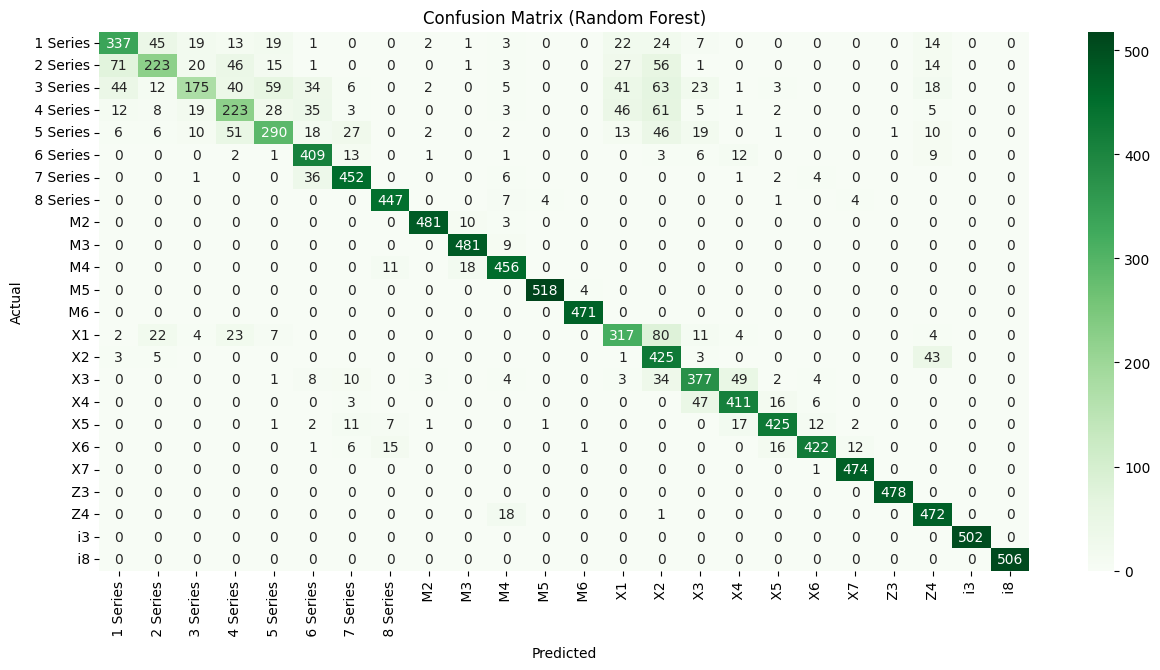

In [8]:
# Confusion Matrix visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()



**PREDIKSI MANUAL DARI USER**


In [9]:
# === PREDIKSI MANUAL (INPUT DARI USER) ===

print("\n=== PREDIKSI MANUAL ===")

# Input data dari user
year = int(input("Masukkan tahun mobil : "))
price = float(input("Masukkan harga mobil (mata uang Inggris (£)): "))
transmission = input("Masukkan jenis transmisi (1 : Manual / 2 : Automatic / 3 : Semi-Auto): ").strip()
mileage = float(input("Masukkan jarak tempuh (mileage): "))
fuelType = input("Masukkan jenis bahan bakar (1 : Petrol / 2 : Diesel / 3 : Hybrid / 4 : Electric / 5 : Other): ").strip()
tax = float(input("Masukkan pajak kendaraan (tax (mata uang Inggris (£))): "))
mpg = float(input("Masukkan konsumsi bahan bakar (mpg (berapa mil yang ditempuh per galon bahan bakar)): "))
engineSize = float(input("Masukkan ukuran mesin (engineSize): "))

# Buat DataFrame dari input
input_data = pd.DataFrame([{
    'year': year,
    'price': price,
    'mileage': mileage,
    'tax': tax,
    'mpg': mpg,
    'engineSize': engineSize,
    'transmission': transmission,
    'fuelType': fuelType
}])

# Encode kategori agar sesuai dengan model
input_encoded = pd.get_dummies(input_data, columns=['transmission', 'fuelType'])
input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Normalisasi dengan scaler yang sama
input_scaled = scaler.transform(input_encoded)

# Prediksi
prediction = model.predict(input_scaled)
predicted_label = le.inverse_transform(prediction)[0]

print(f"\n🚗 Prediksi Model Mobil BMW: {predicted_label}")



=== PREDIKSI MANUAL ===
Masukkan tahun mobil : 2003
Masukkan harga mobil (mata uang Inggris (£)): 3450
Masukkan jenis transmisi (1 : Manual / 2 : Automatic / 3 : Semi-Auto): 3
Masukkan jarak tempuh (mileage): 690
Masukkan jenis bahan bakar (1 : Petrol / 2 : Diesel / 3 : Hybrid / 4 : Electric / 5 : Other): 4
Masukkan pajak kendaraan (tax (mata uang Inggris (£))): 145
Masukkan konsumsi bahan bakar (mpg (berapa mil yang ditempuh per galon bahan bakar)): 123
Masukkan ukuran mesin (engineSize): 1

🚗 Prediksi Model Mobil BMW:  1 Series
